In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

import warnings
warnings.filterwarnings('ignore')

In [58]:
x, y = make_blobs(n_samples=1000,n_features=2,centers=3, random_state=100)

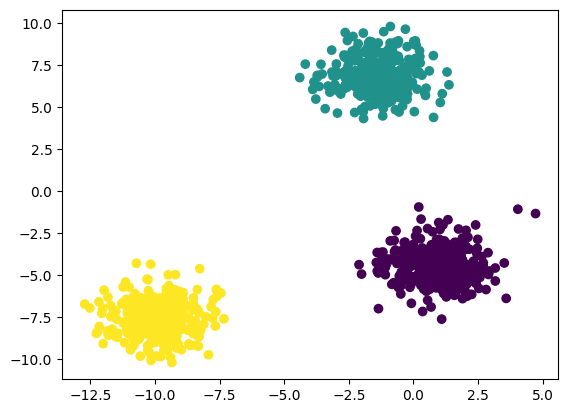

In [59]:
plt.scatter(x[:,0],x[:,1], c=y)

In [60]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [61]:
scaler = StandardScaler()
scaler.fit(x_train)

x_train_sc = scaler.transform(x_train)
x_test_sc = scaler.transform(x_test)

In [72]:
kmean = KMeans(n_clusters=4,init="k-means++")
kmean.fit(x_train_sc,y_train)

KMeans(n_clusters=4)

In [73]:
test_pred = kmean.predict(x_test_sc)
train_pred = kmean.predict(x_train_sc)

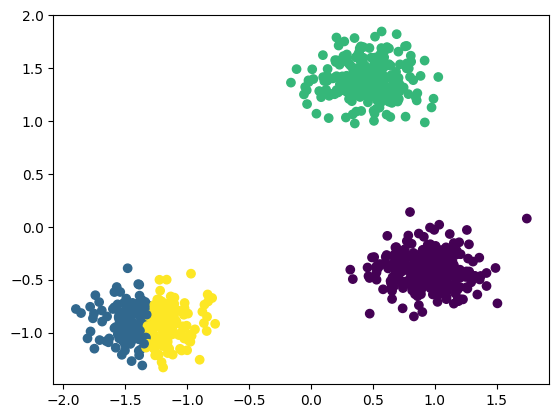

In [83]:
plt.scatter(x_train_sc[:,0],x_train_sc[:,1],c=train_pred)

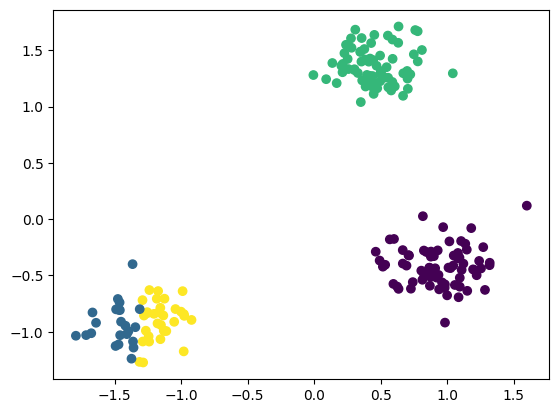

In [78]:
plt.scatter(x_test_sc[:,0],x_test_sc[:,1],c=test_pred)

In [91]:
silhouette_score(x_test_sc,labels=test_pred)

np.float64(0.687356893371295)

In [81]:
km = KMeans(n_clusters=3,init='k-means++')
km.fit(x_train_sc,y_train)

KMeans(n_clusters=3)

In [84]:
test_pred_new = km.predict(x_test_sc)
train_pred_new = km.predict(x_train_sc)

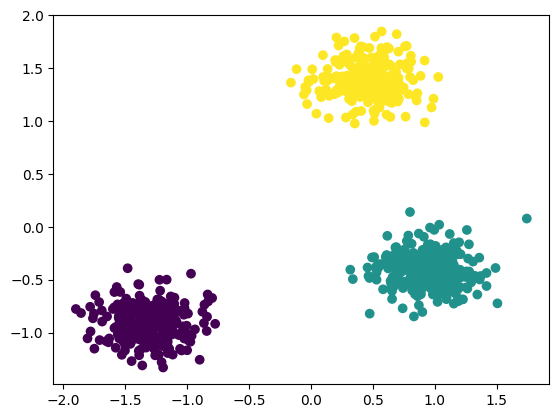

In [86]:
plt.scatter(x_train_sc[:,0],x_train_sc[:,1],c=train_pred_new)

In [95]:
silhouette_score(x_test_sc,labels=test_pred_new)

np.float64(0.8290179170664891)

## Finding value of K

In [103]:
wcss=[]
for k in range(1,11):
    kmn = KMeans(n_clusters=k,init='k-means++')
    kmn.fit(x_train_sc)
    wcss.append(kmn.inertia_)



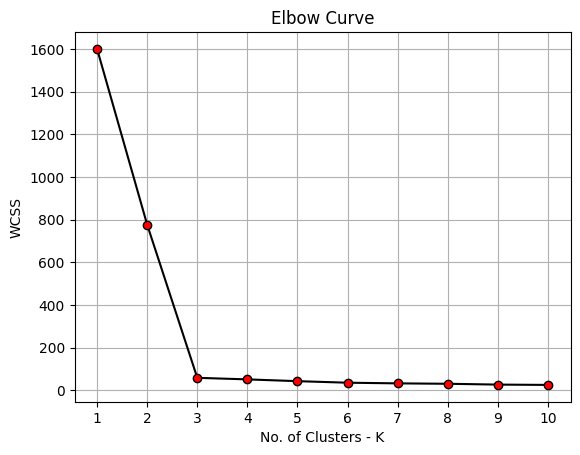

In [127]:
plt.plot(range(1,11),wcss,color='k',marker='o',markerfacecolor='red')
plt.title("Elbow Curve")
plt.xlabel("No. of Clusters - K")
plt.ylabel("WCSS")
plt.xticks(np.arange(1,11))
plt.grid()
plt.show()

In [129]:
from kneed import KneeLocator

In [140]:
kl = KneeLocator(range(1,11),wcss,curve='convex',direction='decreasing')
print(kl.elbow)

3


In [154]:
silhouette = []
for k in range(2,11):
    kmn = KMeans(n_clusters=k,init='k-means++')
    kmn.fit(x_train_sc)
    score =silhouette_score(x_train_sc,kmn.labels_)
    print(score)
    silhouette.append(score)
    

0.6719658189433153
0.8323625129616636
0.6738930647463224
0.5197883151826472
0.48646959271199536
0.4950554070154108
0.3384868700879572
0.32201894724466457
0.33057192636526006


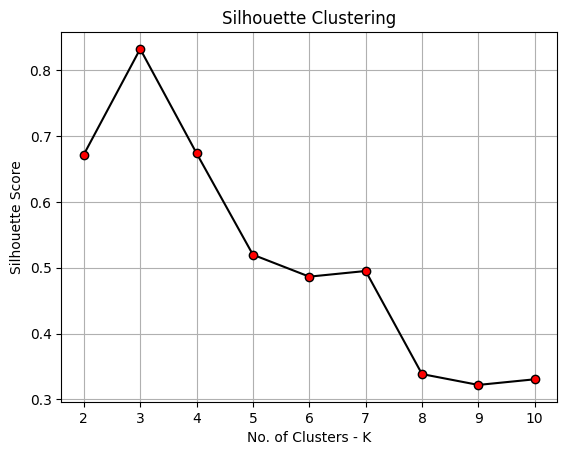

In [155]:
plt.plot(range(2,11),silhouette,color='k',marker='o',markerfacecolor='red')
plt.title("Silhouette Clustering")
plt.xlabel("No. of Clusters - K")
plt.ylabel("Silhouette Score")
plt.xticks(np.arange(2,11))
plt.grid()
plt.show()